# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import json
from datetime import datetime as dt

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#print(url)

In [11]:
# Create empty lists to append the API data into lists 
city_name = []
temps = []
humid = []
cloudiness = []
wind_speed = []
lats = []
longs = []
country=[]
date=[]

# Start the call counter 
counter = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    
    response = requests.get(f"{url}&q={city}").json()
    try: 
        city_name.append(response["name"])
        temps.append(response["main"]["temp_max"])
        humid.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {counter} | {city}")
        #print(f"{url}&q={city}")
        
        # Increase counter by one 
        counter = counter + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | san diego
Processing Record 2 | upernavik
Processing Record 3 | jagodina
Processing Record 4 | pevek
Processing Record 5 | punta arenas
Processing Record 6 | mataura
Processing Record 7 | lexington
Processing Record 8 | taitung
Processing Record 9 | busselton
Processing Record 10 | saint-philippe
Processing Record 11 | vozdvizhenka
City not found. Skipping...
Processing Record 12 | teguldet
Processing Record 13 | albany
Processing Record 14 | mangai
City not found. Skipping...
Processing Record 15 | torbay
Processing Record 16 | mandalgovi
Processing Record 17 | baykit
Processing Record 18 | beroroha
Processing Record 19 | hilo
Processing Record 20 | blagodatnoye
City not found. Skipping...
Processing Record 21 | lebu
Processing Record 22 | rikitea
Processing Record 23 | albina
Processing Record 24 | alvaraes
Processing Record 25 | juba
Processing Record 26 | half moon bay
Processing Record 27 | port alfred


Processing Record 229 | buala
Processing Record 230 | san carlos
Processing Record 231 | kurchum
Processing Record 232 | faanui
Processing Record 233 | ancud
Processing Record 234 | towada
Processing Record 235 | isangel
Processing Record 236 | mehamn
Processing Record 237 | yoro
Processing Record 238 | bud
Processing Record 239 | amapa
Processing Record 240 | lakes entrance
Processing Record 241 | jalu
Processing Record 242 | ponta do sol
Processing Record 243 | broken hill
Processing Record 244 | usolye
Processing Record 245 | pemangkat
Processing Record 246 | luderitz
Processing Record 247 | plettenberg bay
Processing Record 248 | lorengau
City not found. Skipping...
Processing Record 249 | dickinson
Processing Record 250 | grindavik
Processing Record 251 | chokurdakh
Processing Record 252 | riyadh
Processing Record 253 | san-pedro
Processing Record 254 | dunedin
Processing Record 255 | lavrentiya
Processing Record 256 | north bend
Processing Record 257 | amos
Processing Record 258 

Processing Record 462 | opuwo
Processing Record 463 | los llanos de aridane
Processing Record 464 | slave lake
Processing Record 465 | pacific grove
Processing Record 466 | tabira
Processing Record 467 | mount gambier
Processing Record 468 | todos santos
Processing Record 469 | tacuarembo
Processing Record 470 | maubeuge
Processing Record 471 | pizarro
Processing Record 472 | tuatapere
Processing Record 473 | nuuk
Processing Record 474 | palenque
Processing Record 475 | kaitangata
Processing Record 476 | iquique
Processing Record 477 | ouegoa
Processing Record 478 | mirador
Processing Record 479 | sangar
Processing Record 480 | parainen
Processing Record 481 | richards bay
Processing Record 482 | grants
Processing Record 483 | huicungo
Processing Record 484 | kaabong
Processing Record 485 | houma
Processing Record 486 | duverge
Processing Record 487 | varhaug
Processing Record 488 | hiranagar
Processing Record 489 | tsabong
Processing Record 490 | mogadishu
Processing Record 491 | bate

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
#create dataframe
city_weather_df = pd.DataFrame({
    "City" : city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humid,
    "Latitude": lats,
    "Longitude" :longs,
    "Max Temp": temps,
    "Wind Speed": wind_speed,
})
city_weather_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Latitude      547
Longitude     547
Max Temp      547
Wind Speed    547
dtype: int64

In [55]:
# save it to CSV file
city_weather_df.to_csv("data/CityData.csv")

# Display data frame head 
city_weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,San Diego,75,US,1604603448,31,32.72,-117.16,89.01,4.70
1,Upernavik,40,GL,1604603267,91,72.79,-56.15,7.50,6.55
2,Jagodina,75,RS,1604603489,100,43.98,21.26,53.60,5.82
3,Pevek,100,RU,1604603204,95,69.70,170.31,29.01,22.77
4,Punta Arenas,75,CL,1604603274,46,-53.15,-70.92,51.80,17.22
5,Mataura,100,NZ,1604603269,96,-46.19,168.86,46.00,1.01
6,Lexington,1,US,1604603434,48,37.99,-84.48,66.00,10.29
7,Taitung City,100,TW,1604603490,68,22.76,121.14,78.17,14.94
8,Busselton,0,AU,1604603262,81,-33.65,115.33,55.99,7.00
9,Saint-Philippe,39,RE,1604603281,64,-21.36,55.77,71.60,5.82


In [37]:
# Calculate current date from datetime library
current_date = dt.now().strftime("(%m/%d/%Y)")
print(current_date)

(11/05/2020)


### Plotting the Data
* Used proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Saved the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

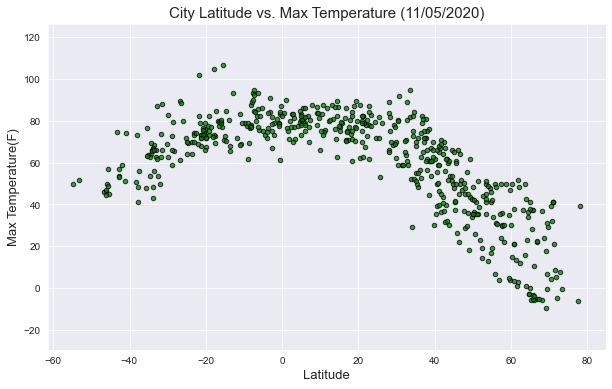

In [66]:
# Create a scatter plot Latitude vs Max Temp
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.scatter(city_weather_df["Latitude"], city_weather_df["Max Temp"], marker="o",s=20,facecolors="green",edgecolor = "black", alpha=0.75)

# Incorporate the graph properties
plt.title("City Latitude vs. Max Temperature" + " " + current_date,fontsize = 15)
plt.xlabel("Latitude",fontsize = 13)
plt.ylabel("Max Temperature(F)",fontsize = 13)
sns.set_style('darkgrid')
plt.ylim(min(city_weather["Max Temp"])-20, max(city_weather["Max Temp"])+20)
plt.grid(True)

#save the figure
plt.savefig("Images/Temperature_in_World_Cities.png")

#show plot
plt.show()

##### The above scatter plot showcase the relationship between Latitude at x-axis vs Max Temperature (F) at the y-axis. This result indicates that there is a higher temrature for the cities that found near to the equater (Latitude 0),however when you go farther from the equator towrads to the north and south the temprature will decrease.

#### Latitude vs. Humidity Plot

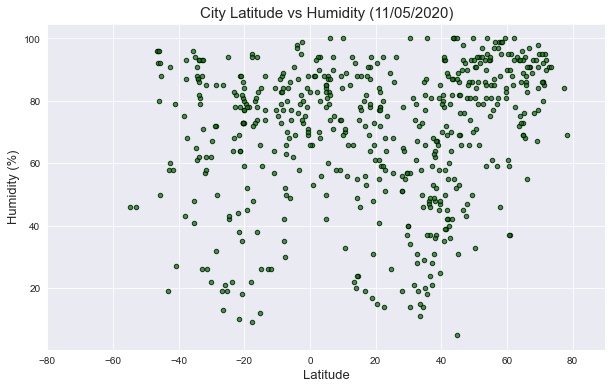

In [65]:
# Create a scatter plot of Humidity vs latitude
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"], marker="o",s=20, facecolors="green",edgecolor = "black", alpha=0.75)

# Incorporate the graph properties
plt.title("City Latitude vs Humidity" + " " + current_date,fontsize = 15)
plt.xlabel("Latitude",fontsize = 13)
plt.ylabel("Humidity (%)",fontsize = 13)
plt.xlim(-80, 90)
plt.grid(True)
sns.set_style('darkgrid')

#save the figure
plt.savefig("Images/Humidity_in_World_Cities.png")

#show plot
plt.show()

##### The above scatter plot displayed the relationship between Humidity (%) vs. Latitude. From the result we can infer that humidity is fairly distributed troughout the plot, so we can say that high humidity occer for both cities found farther or near to the equator.

#### Latitude vs. Cloudiness Plot

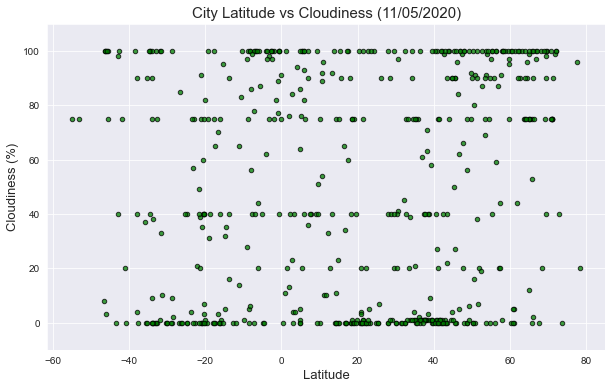

In [64]:
# Create a scatter plot of Latitude Vs Cloudiness
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness"], marker="o",s=20, facecolors="green", edgecolor = "black", alpha=0.75)

# Incorporate the graph properties
plt.title("City Latitude vs Cloudiness" + " " + current_date ,fontsize = 15)
plt.xlabel("Latitude",fontsize = 13)
plt.ylabel("Cloudiness (%)",fontsize = 13)
plt.ylim(min(city_weather["Cloudiness"])-10, max(city_weather["Cloudiness"])+10)
plt.grid(True)
sns.set_style('darkgrid')

#save the figure
plt.savefig("Images/Cloudiness_In_World_Cities.png")

#show plot
plt.show()

##### The above scatter plot showed the relationship between the cities cloudness, and latitude. From this result we can tell that the data is evenly distributed, and there is no difference in Cloudiness when the cities farther or nearer to the equater(Latitude 0).

#### Latitude vs. Wind Speed Plot

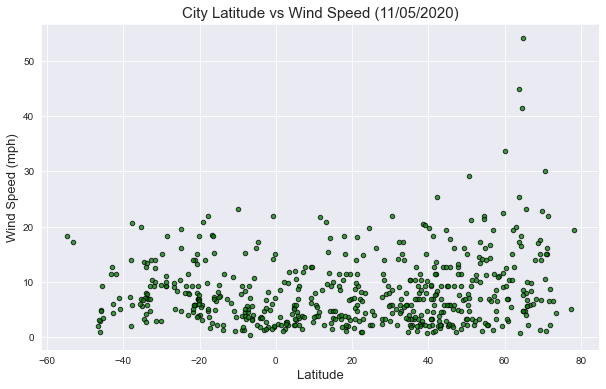

In [63]:
# Create a scatter plot of latitude vs wind speed
fig1, ax1 = plt.subplots(figsize=(10,6))
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed"],marker="o",s=20, facecolors="green", edgecolor = "black", alpha=0.75)

# Incorporate the graph properties
plt.title("City Latitude vs Wind Speed" + " " + current_date,fontsize = 15)
plt.xlabel("Latitude",fontsize = 13)
plt.ylabel("Wind Speed (mph)",fontsize = 13)
plt.grid(True)
sns.set_style('darkgrid')

#save the figure
plt.savefig("Images/Wind_Speed_In_World_Cities.png")

#show plot
plt.show()

##### The above scatter plot showed the relationship between wind speed (mph), and latitude. The plot displayed the lower wind speed when the cities closer to the equater (latitude 0) and somehow the wind speed increases for the cities farther from the equator (Latitude 60).